In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv(r'E:\data science\mercari\train.tsv', delimiter='\t')

data.head(10)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity
5,5,Bundled items requested for Ruie,3,Women/Other/Other,NaN,59.0,0,"Banana republic bottoms, Candies skirt with ma..."
6,6,Acacia pacific tides santorini top,3,Women/Swimwear/Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,7,Girls cheer and tumbling bundle of 7,3,Sports & Outdoors/Apparel/Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,8,Girls Nike Pro shorts,3,Sports & Outdoors/Apparel/Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.
9,9,Porcelain clown doll checker pants VTG,3,Vintage & Collectibles/Collectibles/Doll,NaN,8.0,0,I realized his pants are on backwards after th...


In [2]:
data.describe() 
## we can see most prices focus on $26 regradless of item. And shipping paid by buyer is more than by seller.

,train_id,item_condition_id,price,shipping
count,593376.000000,593376.000000,593376.000000,593376.000000
mean,296687.500000,1.907738,26.689003,0.446294
std,171293.041002,0.902921,38.340061,0.497108
min,0.000000,1.000000,0.000000,0.000000
25%,148343.750000,1.000000,10.000000,0.000000
50%,296687.500000,2.000000,17.000000,0.000000
75%,445031.250000,3.000000,29.000000,1.000000
max,593375.000000,5.000000,2000.000000,1.000000


In [3]:
data.info()
## we can see that brand_name has near half values are missing values. We need to fill them out first before algorithm

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593376 entries, 0 to 593375
Data columns (total 8 columns):
train_id             593376 non-null int64
name                 593376 non-null object
item_condition_id    593376 non-null int64
category_name        590835 non-null object
brand_name           340359 non-null object
price                593376 non-null float64
shipping             593376 non-null int64
item_description     593375 non-null object
dtypes: float64(1), int64(3), object(4)
memory usage: 36.2+ MB


In [4]:
## The category name is seperated in five sub-categories. 

df = data['category_name'].str.split('/',expand=True)

df = df.rename(columns={0:'Cat1',1:'Cat2',2:'Cat3',3:'Cat4',4:'Cat5'})

data = data.join(df)

data.head()


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Cat1,Cat2,Cat3,Cat4,Cat5
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,Men,Tops,T-shirts,None,None
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,None,None
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,None,None
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,None,None
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,None,None


In [5]:
## Women item takes almost half of the entire items

data['Cat1'].describe()



count     590835
unique        10
top        Women
freq      265870
Name: Cat1, dtype: object

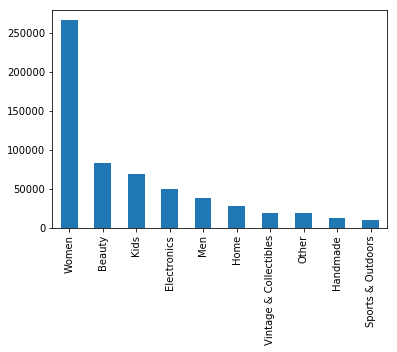

In [6]:
## The first sub-category contains 10 items. 
## Two items are relevant to gender: Men and Women. One item is Kids. Then we might use that for feature engineering.
temp1 = data['Cat1'].value_counts()
temp1.plot(kind='bar')
plt.show()

In [7]:
## the second sub-category has 113 items. Athletic apparel is the top one. We might figure out how to sort this out.  
data['Cat2'].describe()

count               590835
unique                 113
top       Athletic Apparel
freq                 53372
Name: Cat2, dtype: object

In [8]:
data['Cat3'].describe()

count                      590835
unique                        829
top       Pants, Tights, Leggings
freq                        23840
Name: Cat3, dtype: object

In [9]:
data['Cat4'].describe()

count       1734
unique         5
top       Tablet
freq        1187
Name: Cat4, dtype: object

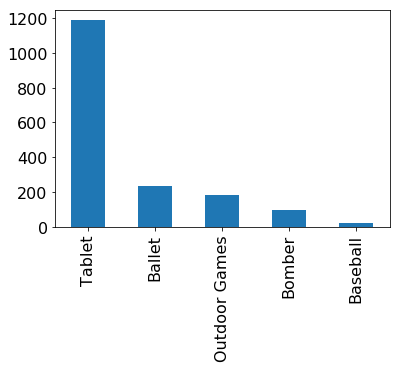

In [10]:
temp4 = data['Cat4'].value_counts()
temp4.plot(kind='bar',fontsize= 16)
plt.show()

In [11]:
data['Cat5'].describe()

count              1187
unique                2
top       eBook Readers
freq                771
Name: Cat5, dtype: object

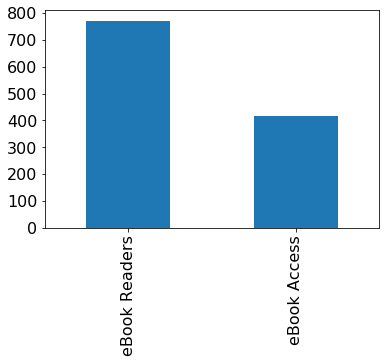

In [12]:
### ebook reader or ebook access for sub-category 5
temp5 = data['Cat5'].value_counts()
temp5.plot(kind='bar',fontsize= 16)
plt.show()

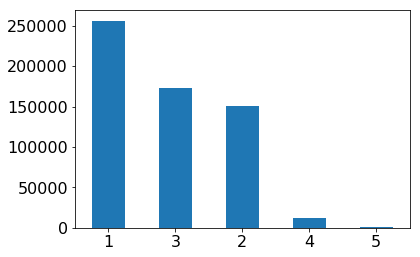

In [13]:
## the items with 1st condition are far more than other conditions. 4th and 5th are the least one 
temp2 = data['item_condition_id'].value_counts()
temp2.plot(kind='bar',rot=0,fontsize=16)
plt.show()

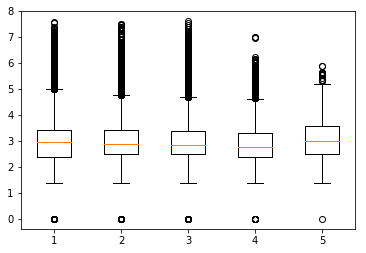

In [14]:
## it shows the relation between log price and item conditions. The median price does not vary to item condition much. 
## the 4th and 5th do not have many outliers as other items.

price_condition1 = np.log(data[data['item_condition_id']==1]['price'] + 1)
price_condition2 = np.log(data[data['item_condition_id']==2]['price'] + 1)
price_condition3 = np.log(data[data['item_condition_id']==3]['price'] + 1)
price_condition4 = np.log(data[data['item_condition_id']==4]['price'] + 1)
price_condition5 = np.log(data[data['item_condition_id']==5]['price'] + 1)

plt.boxplot ([price_condition1, price_condition2, price_condition3, price_condition4,price_condition5])
plt.show()

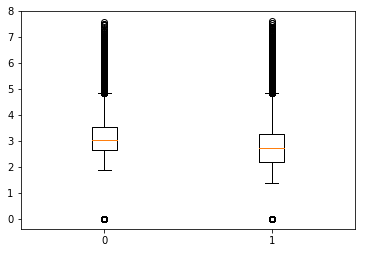

In [15]:
## the median log price with shipping paid by buyer is slightly higher than the median log price with shipping paid by seller.

def price_shipping(price):
    price_sh1 = np.log(price[price['shipping']==1]['price'] + 1)
    price_sh0 = np.log(price[price['shipping']==0]['price'] + 1)
    price_to_plot = [price_sh0,price_sh1]
    return price_to_plot

pl = price_shipping(data)

plt.boxplot(pl,labels=list('01'))
plt.show()

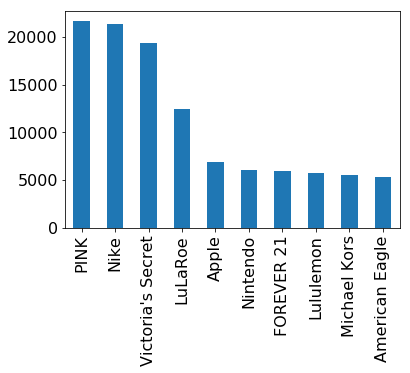

In [16]:
## top 10 brand name 
temp6 = data['brand_name'].value_counts()[:10]
temp6.plot(kind='bar',rot=90,fontsize=16)
plt.show()

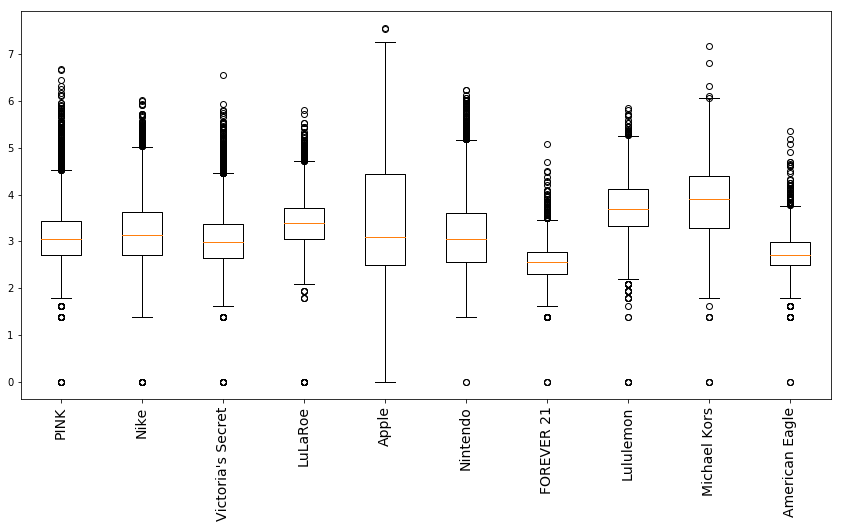

In [17]:
def price_brand(index, data_set):
    price =[]
    for n in index:
        price_b = np.log(data_set[data_set['brand_name']==n]['price'] + 1)
        price.append(price_b)
    return price

pb = price_brand(temp6.index, data)
plt.xticks(fontsize=14, rotation='vertical')
plt.boxplot(pb, labels = temp6.index)
plt.subplots_adjust(right=2, bottom=0.15, top=1.5)
plt.show()

In [18]:
## let's fill some missing values for brand_name and category name. 
## first let's find out how those missing values are distributed in data set. Let's fill missing value for category_name.

data[data['category_name'].isnull()].head()




,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,Cat1,Cat2,Cat3,Cat4,Cat5
122,122,Bundle,3,NaN,NaN,59.0,0,Sizes and info of clothes can be found on thei...,NaN,None,None,None,None
155,155,3 Nora Roberts Books,3,NaN,NaN,10.0,1,For aferg16.,NaN,None,None,None,None
258,258,ACER Laptop,5,NaN,NaN,14.0,0,"Powers on, no screen display, no external dama...",NaN,None,None,None,None
984,984,AUTHENTIC BRWN MICHAEL KORS MAKEUP STAIN,4,NaN,Michael Kors,18.0,0,No description yet,NaN,None,None,None,None
1185,1185,Teenage Mutant Ninja Turtle Van/ Extras,3,NaN,Nickelodeon,9.0,0,"Teenage Mutant Ninja Turtle Van, April O'Neil ...",NaN,None,None,None,None
